# dsDNA UV-Vis Melting Curve Analysis

Notebook by: Giacomo Fabrini, 3rd Year PhD student in the Chemistry Department at Imperial College London in Lorenzo Di Michele's Lab (https://www.dimichelelab.org). 

## Initial Disclaimer and References

The code presented in this notebook was written by me (Giacomo Fabrini) to automatically perform the UV-Vis Melting Curve analysis detailed in the following paper:   
  
[1]: Jean-Louis Mergny and Laurent Lacroix, "Analysis of Thermal Melting Curves", *Oligonucleotides* **2003**, 13 (6), 515-537. 

The model datasets have been acquired by me on an Agilent Cary 3500 UV-Vis Spectrophotometer in Lorenzo Di Michele's Lab (https://www.dimichelelab.org) at Imperial College London in September 2020.   
The datasets refer to measurements performed on the following double-stranded DNA constructs:    
   
A) 9bp duplex (dataset 1):                
Strand 1:                
5' - TTATACATCTA - 3'  
Strand 2:   
5' - CTAGATGTAT - 3'   
  
and    

B) 10bp duplex (dataset 2):   
Strand 1:   
5' - TTATACATCTAG - 3'  
Strand 2 (same as above):  
5' - CTAGATGTAT - 3'  

For the code to run, the following dependencies are needed: NumPy, Pandas and Matplotlib.

## Importing Dependencies

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Importing Model Dataset

In [58]:
ds1 = pd.read_csv('Model_dataset1.csv')
ds2 = pd.read_csv('Model_dataset2.csv')

In [59]:
# Column Extraction from 1st dataset

# Repeats are stacked column-wise. For each repeat, we will extract the temperature and absorbance arrays. 
# The .drop() method is used to remove the data type identifier string in the first row (Temperature (C) or Abs)
# Since the columns contain strings as their first elements, everything is interpreted as a generalised object, 
# but we want to read values as floating point numbers, hence type casting to np.float64. 

abs1_up1 = np.array(ds1['A260nm_Up1_0.0-60.0C'].drop(0), np.float64)
t1_up1 = np.array(ds1['Temp_Up1_0.0-60.0C'].drop(0), np.float64)

abs1_dw1 = np.array(ds1['A260nm_Down1_60.0-0.0C'].drop(0), np.float64)
t1_dw1 = np.array(ds1['Temp_Down1_60.0-0.0C'].drop(0), np.float64)

abs1_up2 = np.array(ds1['A260nm_Up2_0.0-60.0C'].drop(0), np.float64)
t1_up2 = np.array(ds1['Temp_Up2_0.0-60.0C'].drop(0), np.float64)

abs1_dw2 = np.array(ds1['A260nm_Down2_60.0-0.0C'].drop(0), np.float64)
t1_dw2 = np.array(ds1['Temp_Down2_60.0-0.0C'].drop(0), np.float64)

In [67]:
# Column Extraction from 2nd dataset
abs2_up1 = np.array(ds1['A260nm_Up1_0.0-60.0C'].drop(0), np.float64)
t2_up1 = np.array(ds1['Temp_Up1_0.0-60.0C'].drop(0), np.float64)

abs2_dw1 = np.array(ds1['A260nm_Down1_60.0-0.0C'].drop(0), np.float64)
t2_dw1 = np.array(ds1['Temp_Down1_60.0-0.0C'].drop(0), np.float64)

abs2_up2 = np.array(ds1['A260nm_Up2_0.0-60.0C'].drop(0), np.float64)
t2_up2 = np.array(ds1['Temp_Up2_0.0-60.0C'].drop(0), np.float64)

abs2_dw2 = np.array(ds1['A260nm_Down2_60.0-0.0C'].drop(0), np.float64)
t2_dw2 = np.array(ds1['Temp_Down2_60.0-0.0C'].drop(0), np.float64)

## Analysis

<img src="DNA_bases.jpeg" width="600"/>

Image taken from: https://commons.wikimedia.org/wiki/File:DNA_Nucleotides.jpg


DNA (DeoxyriboNucleic Acid) usually exists as a **double helix** (dsDNA) as the genetic material instructing our cells and our whole body in how to work. The two strands bind in very specific ways, A with T, C with G, via Watson-Crick base-pairing.   
These hydrogen bonds can be disrupted by heating up the system, thus dissociating duplex (a.k.a. double stranded) DNA into single stranded DNA (ssDNA). This can be observed via melting/denaturation experiments.

<img src="denaturation.png" width="500"/>

Image taken from Ref [1]

The Melting Temperature ($T_m$) is defined as the temperature where half of the bases are paired and half are unpaired, thus yielding a folded fraction of 0.5. 
This can be experimentally measured via UV-Vis spectroscopy. In fact, DNA exhibits peak absorbance around 260 nm. **Moreover, double stranded DNA has an absorbance that is less than 2x the one for single stranded DNA. Therefore, melting a duplex leads to a 15-20% increase in absorbance at 260 nm.**  
Due to the non-idealities of the system (non-zero dependance of absorbance on temperature even when DNA is totally folded/unfolded, temperature drift, and so on), some data processing is needed to extract the melting temperature, which is an important parameter to evaluate the *stability of a duplex*.

<img src="melting.png" width="500"/>

Image taken from Ref [1]

The following function takes as input some melting curves/profiles (x = Temperature,y = Absorbance) + temperature ranges for baseline capturing. We could identify these ranges with two temperature values only, with the lower baseline starting value and the upper basleline ending value being implicitly determined by the lowest and highest examined temperature values, e.g. 0-10, 50-60 requires us to provide only 10 and 50 as values. Thus the function, int its most simple format, will look something like: 

<code> def func(temp_values, abs_profile, T1, T2)</code>

We then need to fit two straight lines to the absorbance profile values in those two temperature ranges.   
Next, we need to extract the intercept values of these two lines at the extremes of the examined temperature range, e.g. 0 and 60 degrees.   
We then calculate the mid point of the two segments determined by the two pairs of intercepts. 
Finally, we draw the line among these two mid points, also known as the **median line** among the two baselines. The intersection among this line and the absorbance profile will provide us with the Melting Temperature ($T_m$) value.

### Some technicalities...

By default, the implemented function will require those 4 inputs, two arrays and two scalar values, and the only output will be the value of the melting temperature in Celsius degrees.<br />
As extra controls and debugging tools, it is possible to have intermediate values printed out via the <code> printMessages</code> boolean option. Just set it to <code>True</code> to have messages printed out.<br />
To check baselines, median line, etc., just set <code>showPlots = True</code>. 
If you notice that the baseline calculation is not correct, e.g. some datapoints at the extremes of the temperature range cause your fit to go crazy, you can provide the starting values for both baselines, which means changing them from their lowest and highest temperature values. This can be achieved via the additional parameters <code>T0</code> and <code>T3</code>. <br />
If you assume that $\Delta H$ and $\Delta S$ are temperature independent and want to check this via a <em>van't Hoff</em> plot, just set <code>calc_Fraction = True</code> and assign a value for <code>C0</code>, your oligonucleotide concentration (it should be the same for both strands in a duplex). This will produce a folded fraction vs Temperature plot. From this, you can calculate a <em>van't Hoff</em> plot by assuming the molecularity of your process is two (duplex DNA). A <em>van't Hoff</em> plot is generally calculated for a much narrower T (or 1/T) range. The defaults will cut off 20 degrees from both the baseline limits. You can change this behaviour via the <code>margin_low</code> and <code>margin_high</code> parameters.<br />
Finally, the <code>calcParams</code> options, when set to <code>True</code>, will calculate temperature independent values for $\Delta H$ and $\Delta S$. From those, it will get a value for $\Delta G$ at 25 $^o C$.

### Function Definition

In [61]:
def melt_temp_extract(temp_array, abs_profile, T1, T2, T0 = None, T3 = None, 
                      printMessages = False, 
                      showPlots = False, 
                      calcFraction = False, 
                      C0 = None, margin_low = 20, margin_high = 20, calcParams = False): 
    
    ## Input: x = temp_array - contains temperature values; y = abs_profile - contains absorbance values;
    ## T1, T2: highest/lowest temperature of low/high temperature baseline;
    ## T0, T3: optional lowest/highest temperature of low/high temperature baseline.
    
    # Check for NaNs (Not a Number values)
    finite_mask = np.isfinite(temp_array)
    temp_array = temp_array[finite_mask]
    abs_profile = abs_profile[finite_mask]
    
    # Flip arrays if cooling curves
    if temp_array[-1] < temp_array[0]:
        temp_array = np.flip(temp_array) # array is reverted via np.flip()
        abs_profile = np.flip(abs_profile)
    
    # Find indices of recorded temperature values closest to T1 and T2
    ind1 = np.argmin(np.abs(temp_array - T1))
    ind2 = np.argmin(np.abs(temp_array - T2))
    if T0 != None:
        ind0 = np.argmin(np.abs(temp_array - T0))
        temp_baseline_low = temp_array[ind0:ind1]
        abs_baseline_low = abs_profile[ind0:ind1]
    else: 
        temp_baseline_low = temp_array[:ind1]
        abs_baseline_low = abs_profile[:ind1]
    if T3 != None:
        ind3 = np.argmin(np.abs(temp_array - T3))
        temp_baseline_high = temp_array[ind2:ind3]
        abs_baseline_high = abs_profile[ind2:ind3]
    else: 
        temp_baseline_high = temp_array[ind2:]
        abs_baseline_high = abs_profile[ind2:]
    
    # Min and max temperature values
    temp_min = np.min(temp_array)
    temp_max = np.max(temp_array)

    # Fitting low baseline (L1, folded) -- 1 comes from folded fraction Theta being equal to 1.
    z_low = np.polyfit(temp_baseline_low, abs_baseline_low, deg = 1) # getting parameters of linear fit
    p_low = np.poly1d(z_low) # estimating values according to linear fit to get the low and high intercepts
    intercept_lowlow = p_low(temp_min)
    intercept_lowhigh = p_low(temp_max)
    
    
    # Fitting high baseline (L0, unfolded) -- 0 comes from folded fraction Theta being equal to 0 (all unfolded).
    z_high = np.polyfit(temp_baseline_high, abs_baseline_high, deg = 1)
    p_high = np.poly1d(z_high)
    intercept_highlow = p_high(temp_min)
    intercept_highhigh = p_high(temp_max)
    
    
    # Segment Mid-points (simply averaging intercepts)
    mid_low = (intercept_lowlow + intercept_highlow)/2
    mid_high = (intercept_lowhigh + intercept_highhigh)/2
    
    # The printMessages flag allows for intermediate calculations to be displayed to double check/debug.
    if printMessages == True: 
        print('Low intercept of low baseline is: ', intercept_lowlow)
        print('High intercept of low baseline is: ', intercept_lowhigh)
        print('Low intercept of high baseline is: ', intercept_highlow)
        print('High intercept of high baseline is: ', intercept_highhigh)
        print('Therefore, mid-point of low intercepts is ', mid_low)
        print('...and mid_point of high intercepts is ', mid_high)
    
    # Median line determination    
    slope = (mid_high - mid_low)/(temp_max - temp_min) # m in our: y = m*x + c equation
    intercept = mid_low - slope*temp_min # c in our: y = m*x + c equation
    # y = m*x + c. We know y(temp_min) = m*temp_min + c. 
    # Thus c = y(temp_min) - m*temp_min
    
    # Estimating values on median_line according to linear model parameters (slope and intercept).
    median_line = slope*temp_array + intercept
    
    # Intersect median line with data (absorbance profile) and find index value for closest recorded temperature
    melt_temp = temp_array[np.argmin(np.abs(abs_profile - median_line))]
    
    
    # The showPlots flag allows the user to decide whether to get plots or not.
    if showPlots == True:
        # Graph your findings
        plt.figure(figsize = (9, 9))
        plt.plot(temp_array, abs_profile)
        plt.plot(temp_baseline_low, p_low(temp_baseline_low), color = 'magenta', lw = 3.0, label = 'L1')
        plt.plot(temp_array[ind1:], p_low(temp_array[ind1:]), '-.', color = 'magenta', lw = 1.0, label = 'L1 - extension')
        plt.plot(temp_baseline_high, p_high(temp_baseline_high), color = 'red', lw = 3.0, label = 'L0')
        plt.plot(temp_array[:ind2], p_high(temp_array[:ind2]), '-.', color = 'red', lw = 1.0, label = 'L0 - extension')
        plt.vlines(np.min(temp_array), np.min(abs_profile), np.max(abs_profile), color = 'black', linestyles = 'dotted')
        plt.vlines(np.max(temp_array), np.min(abs_profile), np.max(abs_profile), color = 'black', linestyles = 'dotted')
        plt.plot(temp_array[0], intercept_lowlow, 'D', ms = 8, color = 'magenta')
        plt.plot(temp_array[-1], intercept_lowhigh, 'D', ms = 8, color = 'magenta')
        plt.plot(temp_array[0], intercept_highlow, 'D', ms = 8, color = 'red')
        plt.plot(temp_array[-1], intercept_highhigh, 'D', ms = 8, color = 'red')
        plt.plot(temp_array, slope*temp_array + intercept, '--', label = 'Median Line')
        plt.vlines(melt_temp, np.min(abs_profile), np.max(abs_profile), linestyles = 'dashed', label = 'Melting Temperature')
        plt.xticks(fontsize = 18)
        plt.yticks(fontsize = 18)
        ax = plt.gca()
        ax.tick_params(direction = 'in', length = 8)
        plt.xlabel('Temperature [$^o$C]', fontsize = 20)
        plt.ylabel('Absorbance [a.u.]', fontsize = 20)
        plt.legend(frameon = False, fontsize = 15)
        
        # The calcFraction flag allows the user to decide whether to calculate the folded fraction profile or not.
        if calcFraction == True: 
            L1 = p_low(temp_array)
            L0 = p_high(temp_array)
            
            fold_frac = (L0 - abs_profile)/(L0 - L1)
            
            plt.figure(figsize = (9, 9))
            plt.plot(temp_array, fold_frac)
            plt.xlabel('Temperature [$^o$C]', fontsize = 20)
            plt.ylabel('Folded Fraction $ \Theta $', fontsize = 20)
            plt.xticks(fontsize = 18)
            plt.yticks(fontsize = 18)
            ax = plt.gca()
            ax.tick_params(direction = 'in', length = 8)
            
            if calcParams == True and C0 != None: 
                C0 = C0*1e-6 # express initial Concentration, C0, in micromolar (uM)
                Ka = (fold_frac)/(C0*(1-fold_frac)**2) # units: 1/M = L/mol. True for bimolecular processes.
                R = 8.3145 # Gas constant in units J/(mol K)
                deltaG = -R*(25+273.15)*np.log(Ka)
                deltaG_25 = deltaG[250]
                temp_array_K = temp_array + 273.15
                z_vH = np.polyfit(1/temp_array_K[10*(T1+margin_low):10*(T2-margin_high)], np.log(Ka[10*(T1+margin_low):10*(T2-margin_high)]), 1)
                p_vH = np.poly1d(z_vH)
                inter_vH = p_vH[0]
                slope_vH = p_vH[1]
                deltaS_vH = inter_vH * R # multiplying by R, gas constant, in J/(mol K)
                deltaH_vH = - slope_vH * R # inverting slope and multiplying by same gas constant, R
                
                plt.figure(figsize = (9, 9))
                plt.plot(1/temp_array_K[10*(T1+margin_low):10*(T2-margin_high)], np.log(Ka[10*(T1+margin_low):10*(T2-margin_high)]), label = 'van\' Hoff plot')
                plt.plot(1/temp_array_K[10*(T1+margin_low):10*(T2-margin_high)], p_vH(1/temp_array_K[10*(T1+margin_low):10*(T2-margin_high)]), label = 'Linear Fit')
                plt.xticks(fontsize = 14)
                plt.yticks(fontsize = 14)
                ax = plt.gca()
                ax.tick_params(direction = 'in', length = 8)
                plt.xlabel('Temperature$^{-1}$, $1/T$  [1/K]', fontsize = 20)
                plt.ylabel('$ln(K_{a})$', fontsize = 20)
                plt.legend(frameon = False, fontsize = 16)
                
                print('Enthalpy variation is', deltaH_vH, ' J/(mol) whereas entropy variation is ', deltaS_vH, ' J/(K mol)')
                print('Free Energy variation at 25C from van\'t Hoff is thus', deltaH_vH - (25+273.15)*deltaS_vH, 'J/mol = ', (deltaH_vH - (25+273.15)*deltaS_vH)/(4.184*1000), 'kcal/mol')
                print('Free Energy variation calculated from Ka is: ', deltaG_25, 'J/(mol) = ', deltaG_25/(4.184*1000), 'kcal/mol')
    
    return melt_temp

## Testing out several cases

__Example of <code>printMessages</code> and <code>showPlots</code>__

Low intercept of low baseline is:  0.16873067867213984
High intercept of low baseline is:  0.18328313659942672
Low intercept of high baseline is:  0.19653970356711756
High intercept of high baseline is:  0.20615642334686782
Therefore, mid-point of low intercepts is  0.1826351911196287
...and mid_point of high intercepts is  0.19471977997314727


24.39999962

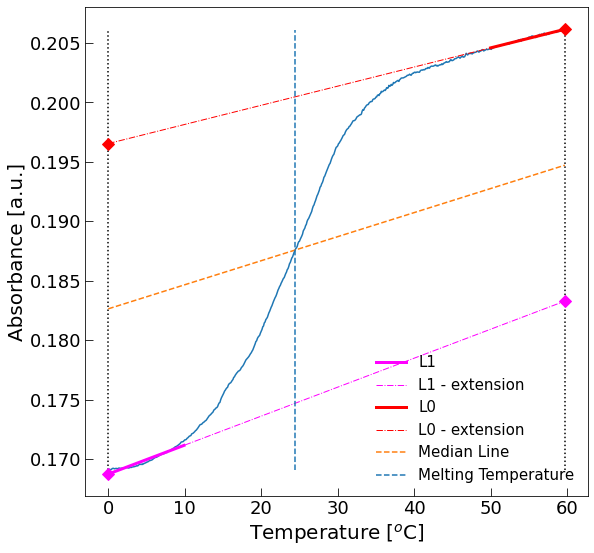

In [62]:
melt_temp_extract(t1_up1, abs1_up1, 10, 50, printMessages = True, showPlots = True)

__Example of simple temperature value extraction__

In [63]:
melt_temp_extract(t1_dw1, abs1_dw1, 2, 50, showPlots = False)

20.20000076

__Example of <code>showPlots</code> only__

23.29999924

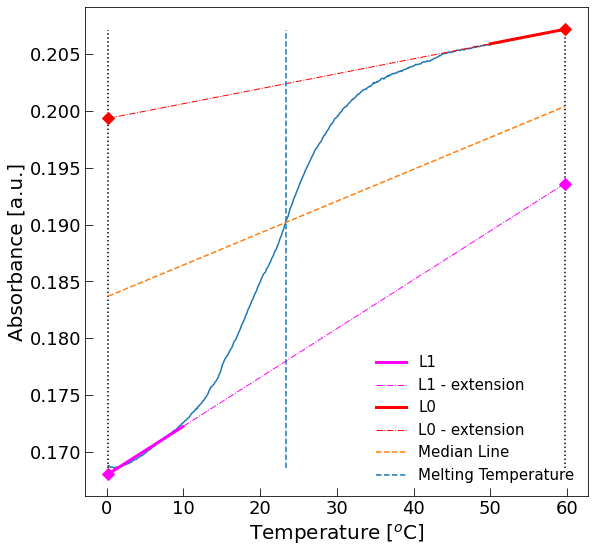

In [64]:
melt_temp_extract(t1_up2, abs1_up2, 10, 50, showPlots=True)

__Example of <code>showPlots</code>, <code>calcFraction</code>, margins and <code>calcParams</code> usage on 2nd construct__

Enthalpy variation is -231346.25506244422  J/(mol) whereas entropy variation is  -657.1422258869767  J/(K mol)
Free Energy variation at 25C from van't Hoff is thus -35419.30041424214 J/mol =  -8.465415968987127 kcal/mol
Free Energy variation calculated from Ka is:  -35454.45181194218 J/(mol) =  -8.473817354670693 kcal/mol


/var/folders/7z/8kdz78ld1q137nb7hwm7skr80000gn/T/ipykernel_22339/1629039533.py:128: RuntimeWarning: invalid value encountered in log
  deltaG = -R*(25+273.15)*np.log(Ka)


23.89999962

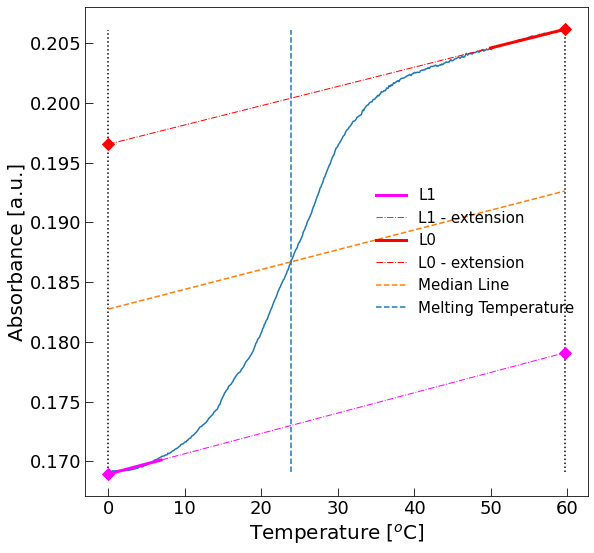

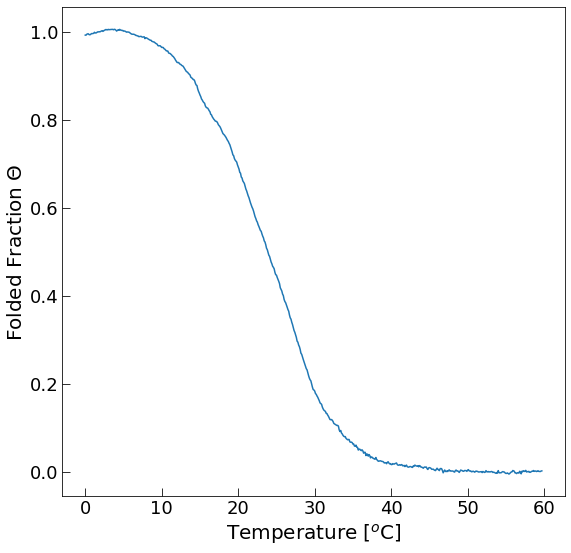

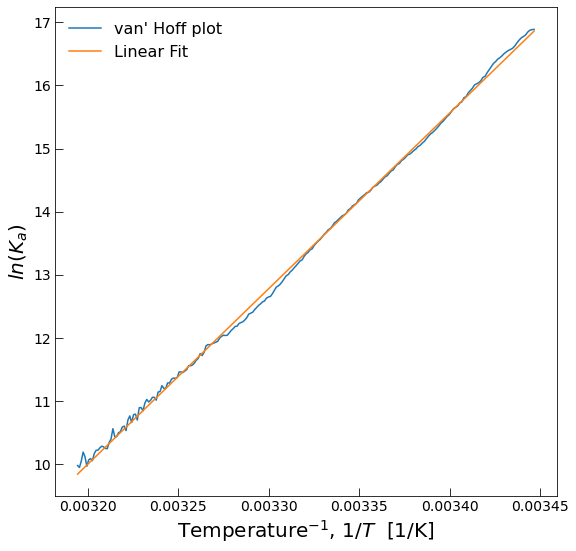

In [72]:
melt_temp_extract(t2_up1, abs2_up1, 7, 50, showPlots = True, calcFraction = True, C0 = 0.9, margin_low = 10, margin_high = 10, calcParams = True)